In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, subprocess
import gzip
%matplotlib inline

### Loading the Data

In [4]:
MNIST_data_path = "./learning_qt/data/MNIST"
with gzip.open("{}/train-images-idx3-ubyte.gz".format(MNIST_data_path), "rb") as train_images_file, gzip.open("{}/train-labels-idx1-ubyte.gz".format(MNIST_data_path), "rb") as train_labels_file, gzip.open("{}/t10k-images-idx3-ubyte.gz".format(MNIST_data_path)) as test_images_file, gzip.open("{}/t10k-labels-idx1-ubyte.gz".format(MNIST_data_path)) as test_labels_file:
    train_images_file = train_images_file.read()
    train_labels_file = train_labels_file.read()
    test_images_file = test_images_file.read()
    test_labels_file = test_labels_file.read()
    train_images = np.frombuffer(train_images_file, dtype=np.uint8, offset=16).astype(np.float32)
    train_labels = np.frombuffer(train_labels_file, dtype=np.uint8, offset=8)
    test_images = np.frombuffer(test_images_file, dtype=np.uint8, offset=16).astype(np.float32)
    test_labels = np.frombuffer(test_labels_file, dtype=np.uint8, offset=8)
    train_images = train_images.reshape(60000,784)
    test_images = test_images.reshape(10000, 784)
    database_train_images = pd.DataFrame(train_images)
    database_train_labels = pd.DataFrame(train_labels)
    database_test_images = pd.DataFrame(test_images)
    database_test_labels = pd.DataFrame(test_labels)

### Sample data

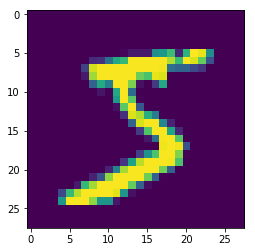

In [5]:
plt.imshow(np.reshape(train_images[0], (28, 28)))
plt.show()

### Shape of train data

In [6]:
train_images.shape

(60000, 784)

In [7]:
train_labels.shape

(60000,)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn import svm

In [10]:
from sklearn.neighbors import KNeighborsClassifier

### subsetting the train data to 1000 images

In [11]:
x_train = train_images[:1000]
y_train = train_labels[:1000]

### Instantiating the various models

In [12]:
logisticRegr = LogisticRegression()

In [13]:
svm_classifer = svm.SVC(gamma=0.01)

In [14]:
knn_classifier = KNeighborsClassifier()

### Training the various models

In [15]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
svm_classifer.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Pickling the models to disk

In [18]:
from sklearn.externals import joblib

In [19]:
joblib.dump(logisticRegr, "model/logistic_model.pk")
joblib.dump(svm_classifer, "model/svm_model.pk")
joblib.dump(knn_classifier, "model/knn_model.pk")

['model/knn_model.pk']

In [20]:
import cv2

In [21]:
inputImage = cv2.imread("learning_qt/.~tmpImage.png")

In [22]:
inputImage = cv2.cvtColor(inputImage, cv2.COLOR_RGB2GRAY)

In [23]:
row, col = inputImage.shape

In [24]:
min_non_zero_pixel = [col, row]
max_non_zero_pixel = [0, 0]
for x in range(row):
    for y in range(col):
        if inputImage[x, y] == 0:
#             print(x, y)
            if y < min_non_zero_pixel[0]:
                min_non_zero_pixel[0] = y
#                 print(min_non_zero_pixel)
            if y > max_non_zero_pixel[0]:
                max_non_zero_pixel[0] = y                           
#                 print(max_non_zero_pixel)
            if x < min_non_zero_pixel[1]:
                min_non_zero_pixel[1] = x
#                 print(min_non_zero_pixel)
            if x > max_non_zero_pixel[1]:
                max_non_zero_pixel[1] = x
#                 print(max_non_zero_pixel)

In [25]:
roi = inputImage[min_non_zero_pixel[1]:max_non_zero_pixel[1], min_non_zero_pixel[0]:max_non_zero_pixel[0]]

In [26]:
subImage = cv2.resize(np.invert(roi), (28, 28))

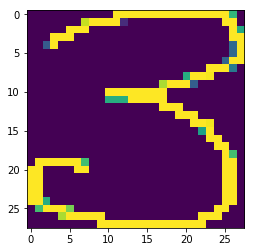

In [27]:
plt.imshow(subImage)

In [30]:
svm_classifer.predict(np.reshape(subImage, (-1, 784)))

array([7], dtype=uint8)

In [31]:
logisticRegr.predict(np.reshape(subImage, (-1, 784)))

array([3], dtype=uint8)

In [32]:
knn_classifier.predict(np.reshape(subImage, (-1, 784)))

array([5], dtype=uint8)